In [ ]:
import pandas as pd 
import numpy as np 
import nltk
nltk.download('punkt')
nltk.download('wordnet')


from nltk.stem import WordNetLemmatizer

#Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
#from textblob import TextBlob



In [ ]:
!pip install plotly
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
#%matplotlib inline

In [ ]:
!pip install nltk

In [ ]:
!pip install --upgrade nbformat

In [ ]:
!python -m pip install --upgrade pip

In [ ]:
!pip install spacy

In [ ]:
!pip install WordCloud

In [ ]:
!pip install gensim

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import nltk
import re
import string
#from nltk.stem import PorterStemmer, WordNetLemmatizerLemmatizer
from nltk.corpus import stopwords

from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from nltk.tokenize import word_tokenize,sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


In [ ]:
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:
#Deep learning libraries
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense,Conv1D,MaxPool1D,Flatten,Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_fake_news = pd.read_csv('/content/drive/My Drive/fake news/Fake.csv')
df_true_news = pd.read_csv('/content/drive/My Drive/fake news/True.csv')

In [ ]:
df_true_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
df_fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
df_true_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_fake_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
df_true_news.info()

In [ ]:
(df_fake_news.shape)

(23481, 4)

In [ ]:
(df_true_news.shape)

(21417, 4)

In [ ]:
df_fake_news['label']=0
df_true_news['label']=1

#df_fake_news.head()
df_true_news.head()


In [ ]:
df = pd.concat([df_true_news,df_fake_news]).reset_index(drop=True)
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
df['finalnews'] = df['title']+ ' ' + df['text']
df

,title,text,subject,date,label,finalnews
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,McPain: John McCain Furious That Iran Treated ...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,How to Blow $700 Million: Al Jazeera America F...


In [ ]:
df['finalnews'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [ ]:
df

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','re','use','edu'])

In [ ]:
def preprocess(text):
    text = str(text).lower().replace('[^\w\s]','') #remove punctuation
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove links 
    res = []
    for word in gensim.utils.simple_preprocess(text):
        if word not in gensim.parsing.preprocessing.STOPWORDS and word not in stop_words:
            res.append(word)
    return res

In [ ]:
df['preprocessed'] = df['finalnews'].apply(preprocess)

In [ ]:
# preprocess('I was going to the salon,  and felt surprised !!! ')

In [ ]:
# preprocess(' The link that i got the news from is https://www.newsblog.com Check it !!. ')

In [ ]:
list_of_words = []
for i in df['preprocessed']:
    for j in i:
        list_of_words.append(j)

In [ ]:
len(list_of_words)

9853912

In [ ]:
total_words = len(list(set(list_of_words)))
total_words

110661

In [ ]:
df['finalnews'] = df['preprocessed'].apply(lambda x: " ".join(x))

In [ ]:
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [ ]:
# word_lemmatizer(['going','crying','singing','running','wanting'])

In [ ]:
# stemmer = PorterStemmer()

In [ ]:
df

In [ ]:
df['lematized'] = df['preprocessed'].apply(lambda x: word_lemmatizer(x))
df

,title,text,subject,date,label,finalnews,preprocessed,lematized
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,budget fight looms republicans flip fiscal scr...,"[budget, fight, looms, republicans, flip, fisc...","[budget, fight, loom, republican, flip, fiscal..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,military accept transgender recruits monday pe...,"[military, accept, transgender, recruits, mond...","[military, accept, transgender, recruit, monda..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,senior republican senator let mr mueller job w...,"[senior, republican, senator, let, mr, mueller...","[senior, republican, senator, let, mr, mueller..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,fbi russia probe helped australian diplomat ti...,"[fbi, russia, probe, helped, australian, diplo...","[fbi, russia, probe, helped, australian, diplo..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,trump wants postal service charge amazon shipm...,"[trump, wants, postal, service, charge, amazon...","[trump, want, postal, service, charge, amazon,..."
...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,mcpain john mccain furious iran treated sailor...,"[mcpain, john, mccain, furious, iran, treated,...","[mcpain, john, mccain, furious, iran, treated,..."
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,justice yahoo settles mail privacy class actio...,"[justice, yahoo, settles, mail, privacy, class...","[justice, yahoo, settle, mail, privacy, class,..."
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,sunnistan allied safe zone plan territorial bo...,"[sunnistan, allied, safe, zone, plan, territor...","[sunnistan, allied, safe, zone, plan, territor..."
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,blow million al jazeera america finally calls ...,"[blow, million, al, jazeera, america, finally,...","[blow, million, al, jazeera, america, finally,..."


In [ ]:
list_of_words_in_lem = []
for i in df['lematized']:
    for j in i:
        list_of_words_in_lem.append(j)

In [ ]:
len(list_of_words_in_lem)

9853912

In [ ]:
total_words_by_lem = len(list(set(list_of_words_in_lem)))
total_words_by_lem

102399

In [ ]:
df

,title,text,subject,date,label,finalnews,preprocessed,lematized
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,budget fight looms republicans flip fiscal scr...,"[budget, fight, looms, republicans, flip, fisc...","[budget, fight, loom, republican, flip, fiscal..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,military accept transgender recruits monday pe...,"[military, accept, transgender, recruits, mond...","[military, accept, transgender, recruit, monda..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,senior republican senator let mr mueller job w...,"[senior, republican, senator, let, mr, mueller...","[senior, republican, senator, let, mr, mueller..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,fbi russia probe helped australian diplomat ti...,"[fbi, russia, probe, helped, australian, diplo...","[fbi, russia, probe, helped, australian, diplo..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,trump wants postal service charge amazon shipm...,"[trump, wants, postal, service, charge, amazon...","[trump, want, postal, service, charge, amazon,..."
...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,mcpain john mccain furious iran treated sailor...,"[mcpain, john, mccain, furious, iran, treated,...","[mcpain, john, mccain, furious, iran, treated,..."
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,justice yahoo settles mail privacy class actio...,"[justice, yahoo, settles, mail, privacy, class...","[justice, yahoo, settle, mail, privacy, class,..."
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,sunnistan allied safe zone plan territorial bo...,"[sunnistan, allied, safe, zone, plan, territor...","[sunnistan, allied, safe, zone, plan, territor..."
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,blow million al jazeera america finally calls ...,"[blow, million, al, jazeera, america, finally,...","[blow, million, al, jazeera, america, finally,..."


In [ ]:
df['finalnews'] = df['lematized'].apply(lambda x: " ".join(x))

In [ ]:
df=df.sample(frac=1).reset_index(drop=True)
df

,title,text,subject,date,label,finalnews,preprocessed,lematized
0,Panic on London's Oxford Street after reports ...,LONDON (Reuters) - Panic erupted among Christm...,worldnews,"November 24, 2017",1,panic london oxford street report shooting lon...,"[panic, london, oxford, street, reports, shoot...","[panic, london, oxford, street, report, shooti..."
1,U.S.-backed forces in Syria holding foreign Is...,BEIRUT (Reuters) - U.S.-backed militias in Syr...,worldnews,"October 19, 2017",1,backed force syria holding foreign islamic sta...,"[backed, forces, syria, holding, foreign, isla...","[backed, force, syria, holding, foreign, islam..."
2,Trump says hopes to avoid use of military acti...,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"September 7, 2017",1,trump say hope avoid military action north kor...,"[trump, says, hopes, avoid, military, action, ...","[trump, say, hope, avoid, military, action, no..."
3,LOL! NYC COLLEGE Tells NYPD To Use Bathroom At...,Brooklyn College is advising New York City pol...,politics,"Nov 21, 2017",0,lol nyc college tell nypd bathroom far end cam...,"[lol, nyc, college, tells, nypd, bathroom, far...","[lol, nyc, college, tell, nypd, bathroom, far,..."
4,Stephen Colbert Mercilessly And Hilariously M...,"In a glorious segment on the Late Show, Stephe...",News,"January 6, 2016",0,stephen colbert mercilessly hilariously mock u...,"[stephen, colbert, mercilessly, hilariously, m...","[stephen, colbert, mercilessly, hilariously, m..."
...,...,...,...,...,...,...,...,...
44893,Someone Just Bought AlternativeFacts.com And ...,Just when you thought you may lose all faith i...,News,"January 26, 2017",0,bought com king brilliant image thought lose f...,"[bought, com, king, brilliant, image, thought,...","[bought, com, king, brilliant, image, thought,..."
44894,UNHINGED FEMINIST PROTESTERS MAKING ‘P*SSYHATS...,As the Pussyhat Project s flier helpfully poin...,left-news,"Jan 15, 2017",0,unhinged feminist protester making ssyhats wea...,"[unhinged, feminist, protesters, making, ssyha...","[unhinged, feminist, protester, making, ssyhat..."
44895,Maher EVISCERATES Trump’s Insane Presser; Get...,Donald Trump is dangerous as president. Anyone...,News,"February 17, 2017",0,maher eviscerates trump insane presser get rea...,"[maher, eviscerates, trump, insane, presser, g...","[maher, eviscerates, trump, insane, presser, g..."
44896,Russia says ready to work with North Korea to ...,MOSCOW (Reuters) - Moscow is prepared to work ...,worldnews,"September 29, 2017",1,russia say ready work north korea resolve miss...,"[russia, says, ready, work, north, korea, reso...","[russia, say, ready, work, north, korea, resol..."


In [ ]:
maxlen1 = -1
for doc in df.finalnews:
    tokens = nltk.word_tokenize(doc)
    if(maxlen1<len(tokens)):
        maxlen1 = len(tokens)
print("The max number of words in an entire news article in the dataset is ", maxlen1)

The max number of words in an entire news article in the dataset is  4594


In [ ]:
x_df=df['finalnews']
y_df=df['label']

In [ ]:
x_df.head()


0    panic london oxford street report shooting lon...
1    backed force syria holding foreign islamic sta...
2    trump say hope avoid military action north kor...
3    lol nyc college tell nypd bathroom far end cam...
4    stephen colbert mercilessly hilariously mock u...
Name: finalnews, dtype: object

In [ ]:
# count_vectorizer = CountVectorizer()
# count_vectorizer.fit_transform(x_df)
# count_vec_matrix = count_vectorizer.transform(x_df)

# tfidf = TfidfTransformer(norm = "l2")
# tfidf.fit(count_vec_matrix)
# tf_idf_matrix = tfidf.fit_transform(count_vec_matrix)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2)

In [ ]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x_train)
count_vec_matrix = count_vectorizer.transform(x_train)
cvm=count_vectorizer.transform(x_test)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(count_vec_matrix)
x_train = tfidf.fit_transform(count_vec_matrix)
x_test=tfidf.fit_transform(cvm)

In [ ]:
from nltk import word_tokenize

In [ ]:
#  padded_train = pad_sequences(train_sequences, maxlen = 4593, padding = 'post', truncating = 'post')
#  padded_test = pad_sequences(test_sequences, maxlen = 4593, truncating = 'post')


In [ ]:
# padded_train

In [ ]:
total_words

110661

In [ ]:
print(x_train.shape)

(35918, 93519)


###logistic regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred1=logreg.predict(x_test)
Accuracy_logreg = logreg.score(x_test, y_test)

print(Accuracy_logreg*100)

98.46325167037861


In [ ]:
cm= confusion_matrix(y_test,y_pred1)  

In [ ]:
cm

array([[4604,   89],
       [  49, 4238]])

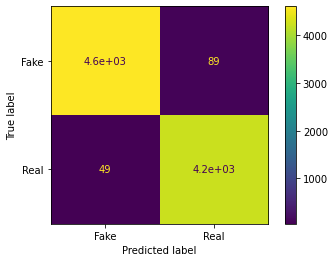

In [ ]:
metrics.plot_confusion_matrix(logreg,x_test,y_test,display_labels=['Fake','Real'])

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4693
           1       0.98      0.99      0.98      4287

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



### Decision Tree

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred2=clf.predict(x_test)
Accuracy_clf = clf.score(x_test, y_test)

print(Accuracy_clf*100)

99.57683741648107


In [ ]:
cm= confusion_matrix(y_test,y_pred2) 
cm

array([[4675,   18],
       [  20, 4267]])

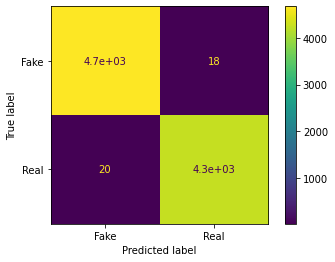

In [ ]:
metrics.plot_confusion_matrix(clf,x_test,y_test,display_labels=['Fake','Real'])

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4693
           1       1.00      1.00      1.00      4287

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



### Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB


NB = MultinomialNB()
NB.fit(x_train, y_train)
y_pred3=NB.predict(x_test)
Accuracy_NB = NB.score(x_test, y_test)

print(Accuracy*100)

93.00668151447663


In [ ]:
cm= confusion_matrix(y_test,y_pred3)
cm 

array([[4414,  279],
       [ 349, 3938]])

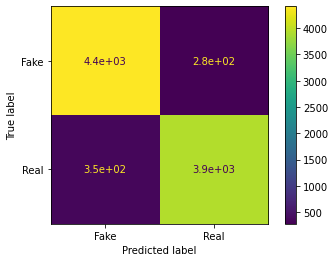

In [ ]:
metrics.plot_confusion_matrix(NB,x_test,y_test,display_labels=['Fake','Real'])

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4693
           1       0.93      0.92      0.93      4287

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



### PAC

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50) 
pac.fit(x_train,y_train) 
#Predict on the test set and calculate accuracy 
y_pred4=pac.predict(x_test) 
score=accuracy_score(y_test,y_pred4)  
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.31%


In [ ]:
cm= confusion_matrix(y_test,y_pred4) 
cm

array([[4654,   39],
       [  23, 4264]])

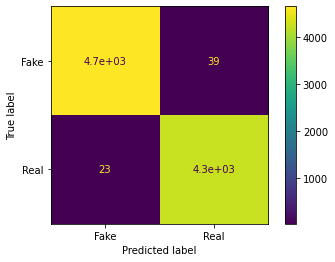

In [ ]:
metrics.plot_confusion_matrix(pac,x_test,y_test,display_labels=['Fake','Real'])

In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4693
           1       0.99      0.99      0.99      4287

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



#KAGGLE

In [ ]:
trainkagg=pd.read_csv('/content/drive/My Drive/fake news/train.csv')
trainkagg

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
trainkagg.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
trainkagg=trainkagg.dropna()
trainkagg.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
trainkagg.shape

(18285, 5)

In [ ]:
trainkagg['preprocessed']=trainkagg['text'].apply(preprocess)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
trainkagg

,id,title,author,text,label,preprocessed
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,"[house, dem, aide, comey, letter, jason, chaff..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"[feeling, life, circles, roundabout, heads, st..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,"[truth, fired, october, tension, intelligence,..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,"[videos, civilians, killed, single, airstrike,..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,"[print, iranian, woman, sentenced, years, pris..."
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,"[rapper, unloaded, black, celebrities, met, do..."
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"[green, bay, packers, lost, washington, redski..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,"[macy, today, grew, union, great, names, ameri..."
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"[nato, russia, hold, parallel, exercises, balk..."


In [ ]:
trainkagg['text']=trainkagg['preprocessed'].apply(lambda x: " ".join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
trainkagg.head(10)

,id,title,author,text,label,preprocessed
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide comey letter jason chaffetz twe...,1,"[house, dem, aide, comey, letter, jason, chaff..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,feeling life circles roundabout heads straight...,0,"[feeling, life, circles, roundabout, heads, st..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,truth fired october tension intelligence analy...,1,"[truth, fired, october, tension, intelligence,..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos civilians killed single airstrike ident...,1,"[videos, civilians, killed, single, airstrike,..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print iranian woman sentenced years prison ira...,1,"[print, iranian, woman, sentenced, years, pris..."
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,trying times jackie mason voice reason week ex...,0,"[trying, times, jackie, mason, voice, reason, ..."
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,paris france chose idealistic traditional cand...,0,"[paris, france, chose, idealistic, traditional..."
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,week michael flynn resigned national security ...,0,"[week, michael, flynn, resigned, national, sec..."
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,organizing action activist group morphed barac...,0,"[organizing, action, activist, group, morphed,..."
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,bbc produced spoof real housewives tv programm...,0,"[bbc, produced, spoof, real, housewives, tv, p..."


In [ ]:
trainkagg['lematized'] = trainkagg['preprocessed'].apply(lambda x: word_lemmatizer(x))
trainkagg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,title,author,text,label,preprocessed,lematized
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide comey letter jason chaffetz twe...,1,"[house, dem, aide, comey, letter, jason, chaff...","[house, dem, aide, comey, letter, jason, chaff..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,feeling life circles roundabout heads straight...,0,"[feeling, life, circles, roundabout, heads, st...","[feeling, life, circle, roundabout, head, stra..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,truth fired october tension intelligence analy...,1,"[truth, fired, october, tension, intelligence,...","[truth, fired, october, tension, intelligence,..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos civilians killed single airstrike ident...,1,"[videos, civilians, killed, single, airstrike,...","[video, civilian, killed, single, airstrike, i..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print iranian woman sentenced years prison ira...,1,"[print, iranian, woman, sentenced, years, pris...","[print, iranian, woman, sentenced, year, priso..."
...,...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,rapper unloaded black celebrities met donald t...,0,"[rapper, unloaded, black, celebrities, met, do...","[rapper, unloaded, black, celebrity, met, dona..."
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,green bay packers lost washington redskins wee...,0,"[green, bay, packers, lost, washington, redski...","[green, bay, packer, lost, washington, redskin..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,macy today grew union great names american ret...,0,"[macy, today, grew, union, great, names, ameri...","[macy, today, grew, union, great, name, americ..."
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,nato russia hold parallel exercises balkans pr...,1,"[nato, russia, hold, parallel, exercises, balk...","[nato, russia, hold, parallel, exercise, balka..."


In [ ]:
trainkagg['text'] = trainkagg['lematized'].apply(lambda x: " ".join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
trainkagg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            18285 non-null  int64 
 1   title         18285 non-null  object
 2   author        18285 non-null  object
 3   text          18285 non-null  object
 4   label         18285 non-null  int64 
 5   preprocessed  18285 non-null  object
 6   lematized     18285 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.1+ MB


In [ ]:
trainkagg['label']=trainkagg['label'].apply(lambda x: 1 if x==0 else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
trainkagg

,id,title,author,text,label,preprocessed,lematized
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide comey letter jason chaffetz twe...,0,"[house, dem, aide, comey, letter, jason, chaff...","[house, dem, aide, comey, letter, jason, chaff..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,feeling life circle roundabout head straight l...,1,"[feeling, life, circles, roundabout, heads, st...","[feeling, life, circle, roundabout, head, stra..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,truth fired october tension intelligence analy...,0,"[truth, fired, october, tension, intelligence,...","[truth, fired, october, tension, intelligence,..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,video civilian killed single airstrike identif...,0,"[videos, civilians, killed, single, airstrike,...","[video, civilian, killed, single, airstrike, i..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print iranian woman sentenced year prison iran...,0,"[print, iranian, woman, sentenced, years, pris...","[print, iranian, woman, sentenced, year, priso..."
...,...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,rapper unloaded black celebrity met donald tru...,1,"[rapper, unloaded, black, celebrities, met, do...","[rapper, unloaded, black, celebrity, met, dona..."
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,green bay packer lost washington redskin week ...,1,"[green, bay, packers, lost, washington, redski...","[green, bay, packer, lost, washington, redskin..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,macy today grew union great name american reta...,1,"[macy, today, grew, union, great, names, ameri...","[macy, today, grew, union, great, name, americ..."
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,nato russia hold parallel exercise balkan pres...,0,"[nato, russia, hold, parallel, exercises, balk...","[nato, russia, hold, parallel, exercise, balka..."


In [ ]:
x_trainkagg=trainkagg['text']
y_trainkagg=trainkagg['label']

In [ ]:
# count_vectorizer = CountVectorizer()
# count_vectorizer.fit_transform(x_trainkagg)
count_vec_matrix2 = count_vectorizer.transform(x_trainkagg)

# tfidf = TfidfTransformer(norm = "l2")
# tfidf.fit(count_vec_matrix2)
tf_idf_matrix2 = tfidf.fit_transform(count_vec_matrix2)

In [ ]:
print(tf_idf_matrix2)

  (0, 91841)	0.0201558265251417
  (0, 90872)	0.047460168102982696
  (0, 90870)	0.10191288628660226
  (0, 90820)	0.04043450143222049
  (0, 90790)	0.014019419226905699
  (0, 90203)	0.01965501183125812
  (0, 89563)	0.018204353363106343
  (0, 89457)	0.03203855797740566
  (0, 89377)	0.013561483237275705
  (0, 89168)	0.012470159927985256
  (0, 88416)	0.03044572083592868
  (0, 88405)	0.02349122043674644
  (0, 88383)	0.01826473188409005
  (0, 86848)	0.07001326281042738
  (0, 86233)	0.037516957650112835
  (0, 86010)	0.018426286527367136
  (0, 85319)	0.04343310540221251
  (0, 84706)	0.045244554882295875
  (0, 84647)	0.06089144167185736
  (0, 84643)	0.08054006400964712
  (0, 84533)	0.02581395672332961
  (0, 84523)	0.07469185036994332
  (0, 83388)	0.04846430508868945
  (0, 82923)	0.029110348130341048
  (0, 82821)	0.014267933655686441
  :	:
  (18284, 7298)	0.030101797115167497
  (18284, 6695)	0.04235921602643708
  (18284, 6650)	0.03344611372002528
  (18284, 6647)	0.04294762502594388
  (18284, 5469)

In [ ]:
print(tf_idf_matrix2.shape)

(18285, 93345)


In [ ]:
Accuracy = logreg.score(tf_idf_matrix2, y_trainkagg)

print(Accuracy*100)

60.12578616352201


In [ ]:
Accuracy = clf.score(tf_idf_matrix2, y_trainkagg)

print(Accuracy*100)

43.71342630571507


In [ ]:
Accuracy = NB.score(tf_idf_matrix2, y_trainkagg)

print(Accuracy*100)

54.90839485917418


In [ ]:
y_pred1=pac.predict(tf_idf_matrix2) 
score=accuracy_score(y_trainkagg,y_pred1)  
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 59.21%
